## Assignment 1

### Question 1

1. Use your regression data and a KNN model for regression. Choose K, say 10, run your code to predict, once with normalizing and other time without normalizing input data (Choose standard normalization). Compare the results. Plot the performance plots (such as what you can find in 010-KNN-Regression-DistanceToGalaxies.ipynb, Jan25). Have a discussion about the model performances and the results. 

### Import the necessary Python packages including:
* numpy for the array capabilities
* pandas for data visualization and manipulation
* matplotlib for plotting
* scikit-learn for its data processing, regressors, feature extraction
* seaborn just to have a nice plotting surface

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Use seaborn to set the plotting style
sns.set_style('whitegrid')

print('Packages imported.')

Packages imported.


### Load the data and display the first 5 rows. Additionally, look at the column information to see if cleaning is necessary

In [2]:
# Load the melanoma data using pandas
skin_data = pd.read_csv('skin_cancer.csv')

# Display the first 5 rows of data
skin_data.head(n=5)


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [3]:
# Display the info about each of the columns to see if cleaning is necessary
skin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


### Look at the histograms of the data before normalization

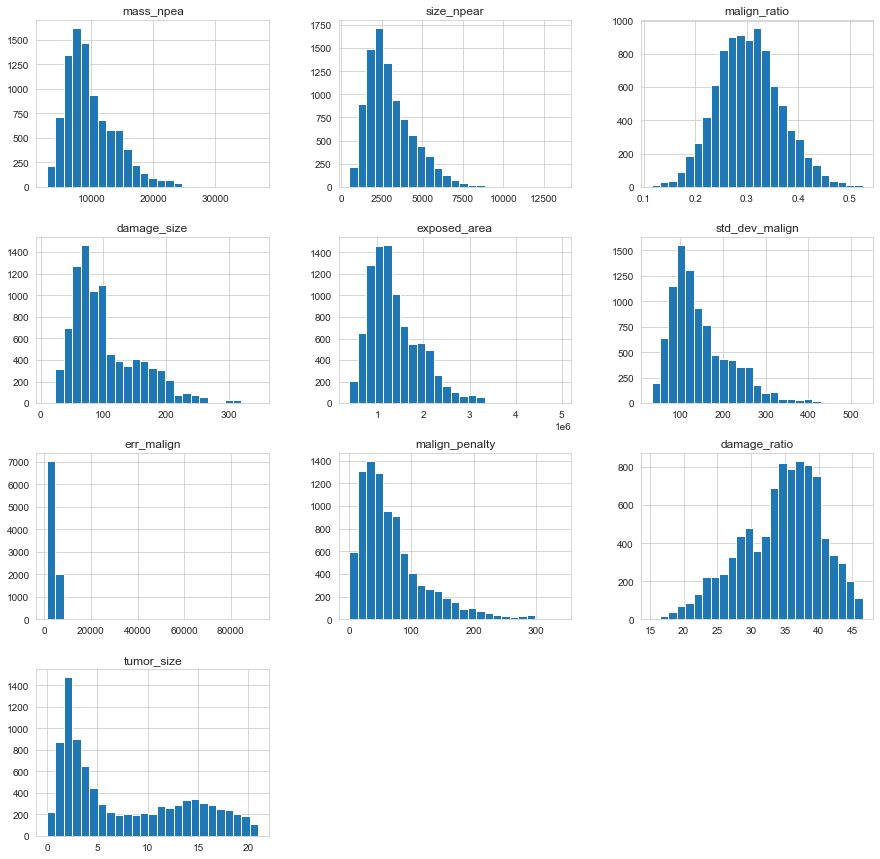

In [4]:
# All data histograms so that we can look at the distributions before and after normalization

skin_data.hist(bins=25, figsize=(15, 15))
plt.show()

### Set the input and target data
Target data is 'tumor_size' or the size of the skin cancer tumor

Also double check the size of the input and target arrays are the same

In [5]:
# Set the input and target data
input_skin = skin_data[['mass_npea', 'size_npear', 'malign_ratio', 'damage_size', 'exposed_area', 'std_dev_malign', 
                        'err_malign', 'malign_penalty', 'damage_ratio']].values
target_skin = skin_data['tumor_size'].values

# Print the shapes of the data to make sure the size is the same (number of rows)
print(f'Input shape: {np.shape(input_skin)}')
print(f'Target shape: {np.shape(target_skin)}')

Input shape: (9146, 9)
Target shape: (9146,)


#### The sizes of the input and target are the same so we're good to go.

### Separate the input and target randomly into a training and validation set
### Validation test is 25% of the 9,146 rows

In [6]:
# Training input, validation input, training target, validation target
# Separately
input_tr, input_va, target_tr, target_va = train_test_split(input_skin, target_skin, test_size=0.25)

# Print the new sizes of the various training and validation sets
print(f'Training set shapes: {np.shape(input_tr)}, {np.shape(target_tr)}')
print(f'Validation set shapes: {np.shape(input_va)}, {np.shape(target_va)}')

Training set shapes: (6859, 9), (6859,)
Validation set shapes: (2287, 9), (2287,)


### Check that the shapes of the distributions of the training and validation sets are roughly the same


Text(0.5, 1.0, 'Validation set')

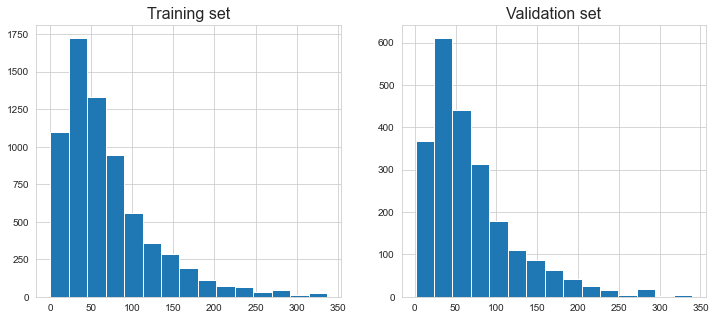

In [7]:
# The column of the input data to examine
col_num = 7

# The figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(input_tr[:, col_num], bins=15)
ax[0].set_title('Training set', fontsize=16)

ax[1].hist(input_va[:, col_num], bins=15)
ax[1].set_title('Validation set', fontsize=16)

### The columns all look like they follow the same distribution, so that's good!

### Set up KNN regressor with k = 10 and p = 2. This is for the data before it is normalized.

Text(25, 0.5, '$\\mu=0.2915$\n$\\mathrm{med}=-1.2931$\n$\\sigma=6.0679$')

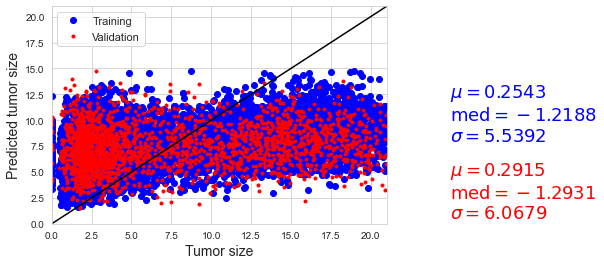

In [8]:
# The KNN regressor, with k = 10 and p = 2
reg = KNeighborsRegressor(n_neighbors=10, p=2)

# Fit the model with un-normalized training set
reg.fit(input_tr, target_tr) 

# Use the regressor to prediction the results for training and validation sets
target_tr_pred = reg.predict(input_tr)  
target_va_pred = reg.predict(input_va)

# Set up the figure to plot the results for both the training and validations set
fig = plt.figure(figsize=(6, 4))
plt.plot(target_tr, target_tr_pred, 'ob') # Training actual vs. predicted in blue
plt.plot(target_va, target_va_pred, '.r')  # Validation actual vs. predicted in red

# Plot a line of slope 1 and intercept 0 to see how well the data agrees with the prediction
plt.plot(np.arange(0, 25, .1),  np.arange(0, 25, .1), '-k')
plt.xlabel('Tumor size', fontsize=14)
plt.ylabel('Predicted tumor size', fontsize=14)
plt.legend(['Training', 'Validation'], fontsize=11)
plt.xlim([0,21])
plt.ylim([0,21])

# Calculate the statistical information for the predicted sets
mu_tr = np.mean(target_tr - target_tr_pred)
median_tr = np.median(target_tr - target_tr_pred)
sigma_tr = np.std(target_tr - target_tr_pred)

mu_va = np.mean(target_va - target_va_pred)
median_va = np.median(target_va - target_va_pred)
sigma_va = np.std(target_va - target_va_pred)

# Add the statistical information regarding training and validation predictions to the side of the plot
text_tr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_tr, median_tr, sigma_tr)
text_va = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_va, median_va, sigma_va)
plt.text(25, 8, text_tr, color='b', fontsize=18)
plt.text(25, 0.5, text_va, color='r', fontsize=18)

### We get good results in terms of the agreement between the training and validation sets, however it's not the best model because we don't get a linear relationship between the actual tumor size and the predicted tumor size. The predicted tumor size is essentially just taking a rough average at this point as the distribution is fairly flat in the y-direction. This is likely due, in part, to the data being un-normalized.

### Now we'll compare the actual and the predicted value in a number of different ways. First we'll look at the distribution of the difference bewteen the real and predicted values.

mean =  -0.2542929581571658
median =  1.2187999999999999
SD =  5.539183628335196


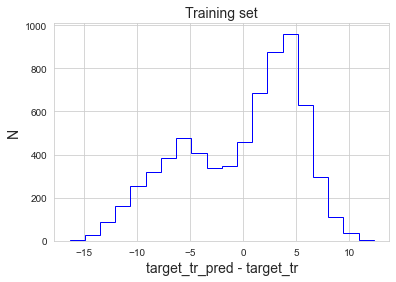

In [9]:
# Inspect the distribution of the difference between the predicted and actual values for the training set 
plt.hist(target_tr_pred - target_tr, 20, color='b', histtype='step')
plt.xlabel('target_tr_pred - target_tr', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('Training set', fontsize=14)

# Print the statistics of the difference
print ('mean = ', np.mean(target_tr_pred - target_tr))
print ('median = ', np.median(target_tr_pred - target_tr))
print ('SD = ', np.std(target_tr_pred - target_tr))

mean =  -0.2915440314822913
median =  1.293099999999999
SD =  6.0679334633507604


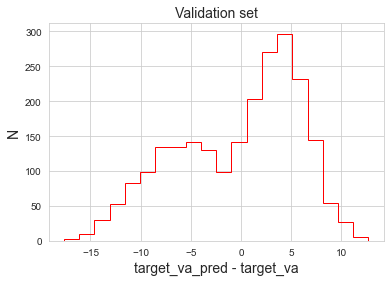

In [10]:
# Inspect the distribution of the difference between the predicted and actual values for the validation set 
plt.hist(target_va_pred - target_va, 20, color='r', histtype='step')
plt.xlabel('target_va_pred - target_va', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('Validation set', fontsize=14)

# Print the statistics of the difference
print ('mean = ', np.mean(target_va_pred - target_va))
print ('median = ', np.median(target_va_pred - target_va))
print ('SD = ', np.std(target_va_pred - target_va))

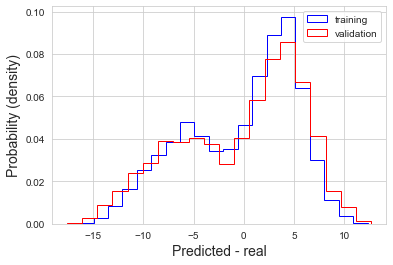

In [11]:
# If the size validation set and training set are different, 
# it would be better to normalize the distributions for a better comparison.
plt.hist(target_tr_pred - target_tr, 20, color='b', histtype='step', density=True, label='training')
plt.hist(target_va_pred - target_va, 20, color='r', histtype='step', density=True, label='validation')
plt.xlabel('Predicted - real', fontsize=14)
plt.ylabel('Probability (density)', fontsize=14)
plt.legend()

### As already stated above, we get good agreement between the distributions of the training and validation sets. However, the distribution has a secondary peak to the left of the main peak. We would like to see a single Gaussian peak indicating that there is very little difference between the real and predicted values.

### Next we'll look at the systematic error.

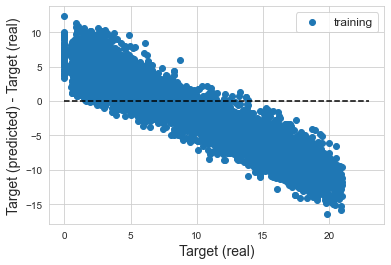

In [12]:
# Inspecting systematic errors for the training set
plt.scatter(target_tr, target_tr_pred - target_tr, label='training')
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([0,23], [0,0], '--k')
plt.legend(fontsize=12)

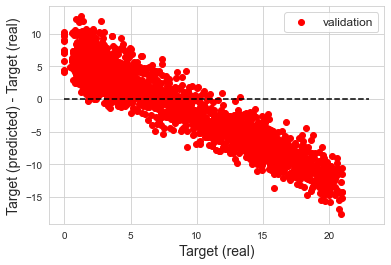

In [13]:
# Inspecting systematic errors for the validation set
plt.scatter(target_va, target_va_pred - target_va, label='validation', color='r')
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([0,23], [0,0], '--k')
plt.legend(fontsize=12)

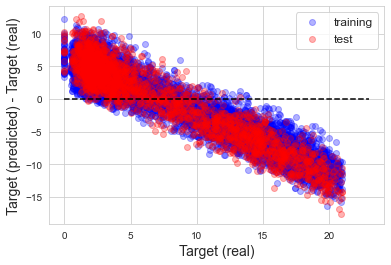

In [14]:
# Inspecting systematic errors for the training set and validation set together 
plt.scatter(target_tr, target_tr_pred - target_tr, label='training', color='b', alpha=.3)
plt.scatter(target_va, target_va_pred - target_va, label='test', color='r', alpha=.3)
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([0,23], [0,0], '--k')
plt.legend(fontsize=12)

### This also follows the results stated above, with good agreement. However, this underscores the fact that the model is currently essentially just predicting an average of the whole data set since we have a linear relationship with the difference of the predicted and real targets with respect to the real target value. We get postive errors with small tumors since the real value is smaller than the predicted (which is the average in this case). And the opposite is true when the real tumor size was large, we get negative errors since the real tumor size is larger than the average tumor size.


## Now do the same thing as we did above, but we'll normalize the data first.

In [15]:
# Apply a standard normalization to the input data
stnd_scaler = StandardScaler().fit(input_tr)
input_tr_norm = stnd_scaler.transform(input_tr)  # Normalize training data
input_va_norm = stnd_scaler.transform(input_va)  # Normalize the validation data

### Look at the histograms of the data after normalization

Text(0.5, 1.0, 'Validation set')

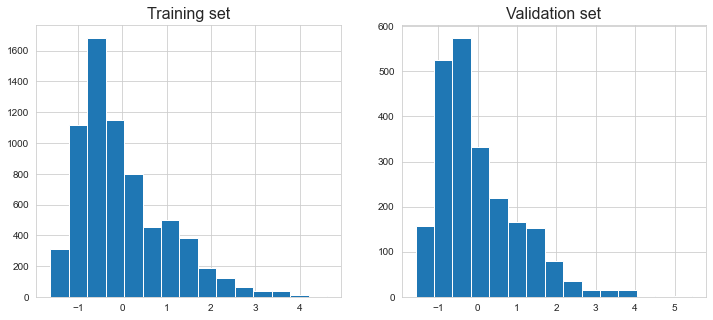

In [16]:
# Examine the input data after normalization for both the training and validation sets

# The column of the input data to examine
col_num = 5

# The figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(input_tr_norm[:, col_num], bins=15)
ax[0].set_title('Training set', fontsize=16)

ax[1].hist(input_va_norm[:, col_num], bins=15)
ax[1].set_title('Validation set', fontsize=16)

### Set up the KNN regressor again for the normalized data with k = 10 and p = 2.

Text(26, 1.2, '$\\mu=0.8170$\n$\\mathrm{med}=0.0104$\n$\\sigma=4.3297$')

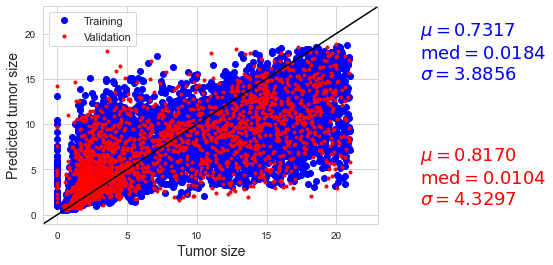

In [17]:
# The KNN regressor, with k = 10 and p = 2
reg = KNeighborsRegressor(n_neighbors=10, p=2)

# Fit the model with the normalized training set
reg.fit(input_tr_norm, target_tr) 

# Use the regressor to prediction the results for training and validation sets
target_tr_pred_norm = reg.predict(input_tr_norm)  
target_va_pred_norm = reg.predict(input_va_norm)

# Set up the figure to plot the results for both the training and validations set
fig = plt.figure(figsize=(6, 4))
plt.plot(target_tr, target_tr_pred_norm, 'ob') # Training actual vs. predicted in blue
plt.plot(target_va, target_va_pred_norm, '.r')  # Validation actual vs. predicted in red

# Plot a line of slope 1 and intercept 0 to see how well the data agrees with the prediction
plt.plot(np.arange(-1, 23, .1),  np.arange(-1, 23, .1), '-k')
plt.xlabel('Tumor size', fontsize=14)
plt.ylabel('Predicted tumor size', fontsize=14)
plt.legend(['Training', 'Validation'], fontsize=11)
plt.xlim([-1, 23])
plt.ylim([-1, 23])

# Calculate the statistical information for the predicted sets
mu_tr_norm = np.mean(target_tr - target_tr_pred_norm)
median_tr_norm = np.median(target_tr - target_tr_pred_norm)
sigma_tr_norm = np.std(target_tr - target_tr_pred_norm)

mu_va_norm = np.mean(target_va - target_va_pred_norm)
median_va_norm = np.median(target_va - target_va_pred_norm)
sigma_va_norm = np.std(target_va - target_va_pred_norm)

# Add the statistical information regarding training and validation predictions to the side of the plot
text_tr_norm = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_tr_norm, median_tr_norm, sigma_tr_norm)
text_va_norm = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_va_norm, median_va_norm, sigma_va_norm)
plt.text(26, 15, text_tr_norm, color='b', fontsize=18)
plt.text(26, 1.2, text_va_norm, color='r', fontsize=18)

### We see similar results again with the normalized data, however the mean of the differences is larger than the un-normalized data. The median of the differences between the real and predicted values are closer to zero, and the standard deviation is smaller than the un-normalized data. So based on this it looks like the difference data (between real and predicted) now has a more even distribution around 0 since the median is closer to zero. And the data is less spread out as well since the standard deviation is smaller. 

### However, this means we likely need to add some extra features to accenuate some of the features we were given since we're still not seeing as good of a predictive model as we'd like.

### Now we'll plot the differences bewteen the actual and the predicted values again.

mean =  -0.7316712494532731
median =  -0.018400000000000194
SD =  3.885587438317677


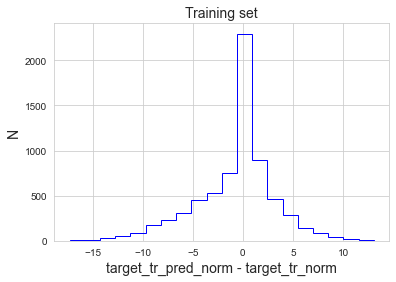

In [18]:
# Inspect the distribution of the difference between the predicted and actual values for the training set 
plt.hist(target_tr_pred_norm - target_tr, 20, color='b', histtype='step')
plt.xlabel('target_tr_pred_norm - target_tr_norm', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('Training set', fontsize=14)

# Print the statistics of the difference
print ('mean = ', np.mean(target_tr_pred_norm - target_tr))
print ('median = ', np.median(target_tr_pred_norm - target_tr))
print ('SD = ', np.std(target_tr_pred_norm - target_tr))

mean =  -0.8169765631832094
median =  -0.010399999999999743
SD =  4.329666319993408


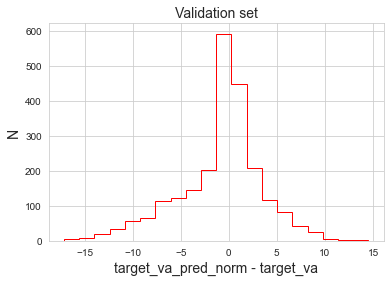

In [19]:
# Inspect the distribution of the difference between the predicted and actual values for the validation set 
plt.hist(target_va_pred_norm - target_va, 20, color='r', histtype='step')
plt.xlabel('target_va_pred_norm - target_va', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('Validation set', fontsize=14)

# Print the statistics of the difference
print ('mean = ', np.mean(target_va_pred_norm - target_va))
print ('median = ', np.median(target_va_pred_norm - target_va))
print ('SD = ', np.std(target_va_pred_norm - target_va))

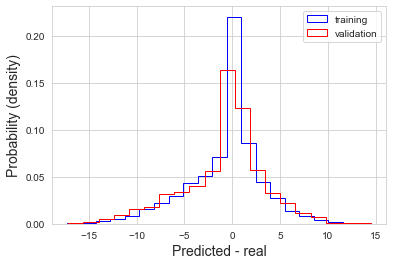

In [20]:
# If the size validation set and training set are different, 
# it would be better to normalize the distributions for a better comparison.
plt.hist(target_tr_pred_norm - target_tr, 20, color='b', histtype='step', density=True, label='training')
plt.hist(target_va_pred_norm - target_va, 20, color='r', histtype='step', density=True, label='validation')
plt.xlabel('Predicted - real', fontsize=14)
plt.ylabel('Probability (density)', fontsize=14)
plt.legend()

### Now we're getting a Gaussian peak, which is great, and we still have good agreement between the training and validation.

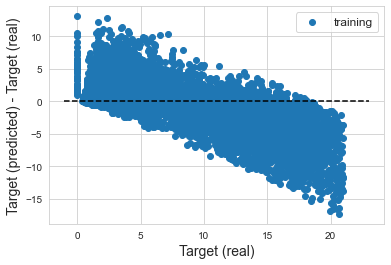

In [21]:
# Inspecting systematic errors for the training set
plt.scatter(target_tr, target_tr_pred_norm - target_tr, label='training')
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([-1, 23], [0, 0], '--k')
plt.legend(fontsize=12)

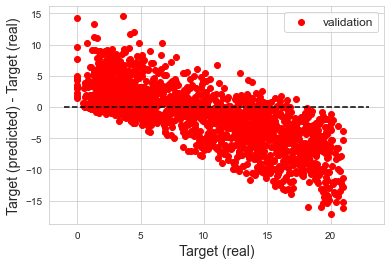

In [22]:
# Inspecting systematic errors for the validation set
plt.scatter(target_va, target_va_pred_norm - target_va, label='validation', color='r')
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([-1, 23], [0, 0], '--k')
plt.legend(fontsize=12)

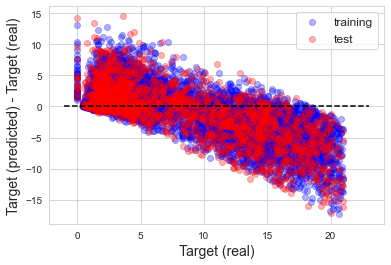

In [23]:
# Inspecting systematic errors for the training set and validation set together 
plt.scatter(target_tr, target_tr_pred_norm - target_tr, label='training', color='b', alpha=.3)
plt.scatter(target_va, target_va_pred_norm - target_va, label='test', color='r', alpha=.3)
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([-1, 23], [0, 0], '--k')
plt.legend(fontsize=12)

### Again about the same results as before, with the model still essentially just predicting an average of the real tumor target values.

## So far, KNN with k = 10 and p = 2 just gives us an average of the actual tumor sizes regardless of whether the data is normalized or not. However, normalizing does give us a more even distribution. The peak on the Gaussian for the normalized data when looking at the distribution of the difference between the real and the predicted is quite high as well though, which could indicate over-fitting potentially, as smaller errors are more prevalent.


## So for small tumors the model predicts tumors that are too large and the opposite for large tumors. Which is not helpful for our case. This will likely require some feature extraction to tease out which of the parameters are most predictive in terms of tumor size.